# week 8: visualizing time series data

Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook. Combine the multiple input files to create a single dataframe.

Create two bar graphs of the power consumption per hour.

- One bar graph has 24 bars; each bar is the average across all days for that hour​
- one bar graph has 24*(number of days) bars. Your choice of average or sum for each hour. Label the y-axis appropriately.
Submit the .ipynb file containing the analysis and the generated pictures.​

First let's install libraries

In [1]:
!pip install plotly==5.20.0

In [2]:
import pandas as pd
import glob
import plotly.express as px

#### Let's define function to load series data

In [3]:
def load_data():
    ### Logic to load multiple csv files referenced from materials provided in class
    path = r'Data'
    all_files = glob.glob(path + "/*.csv") #storing all the .csv files

    files_list = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        files_list.append(df)
    df = pd.concat(files_list, axis=0, ignore_index=True)
    return df

#### Let's load data into dataframe

In [4]:
df = load_data()

#### Let's check the data

In [5]:
df.head()

,HDR,ROLLING SYSTEM DEMAND
0,20240331000000,22805.0
1,20240331000500,22807.0
2,20240331001000,22893.0
3,20240331001500,22966.0
4,20240331002000,22794.0


In [6]:
df.tail()

,HDR,ROLLING SYSTEM DEMAND
3455,20240324234000,24831.0
3456,20240324234500,24725.0
3457,20240324235000,24487.0
3458,20240324235500,24386.0
3459,1440,NaN


#### From above findings we can check that we have null values so let's check and eliminate those

In [7]:
df.isnull().sum()

HDR                      0
ROLLING SYSTEM DEMAND    4
dtype: int64

In [8]:
df.dropna(inplace=True)

#### Renaming columns to meaningful names

In [9]:
df.columns = ["Date and Time", "Supply"]

### Let's create new columns for Date and hour of the day

In [10]:
df["Date and Time"] = pd.to_datetime(df['Date and Time'], format="%Y%m%d%H%M%S")
df['Date'] = df['Date and Time'].dt.strftime('%Y/%m/%d')
df['Hour'] = df['Date and Time'].dt.hour
df.head()

,Date and Time,Supply,Date,Hour
0,2024-03-31 00:00:00,22805.0,2024/03/31,0
1,2024-03-31 00:05:00,22807.0,2024/03/31,0
2,2024-03-31 00:10:00,22893.0,2024/03/31,0
3,2024-03-31 00:15:00,22966.0,2024/03/31,0
4,2024-03-31 00:20:00,22794.0,2024/03/31,0


#### Let's plot first graph to display average supply for each hour.

In [11]:
fig1 = px.histogram(df, x='Hour', y='Supply', histfunc='avg', text_auto=True)
fig1.update_layout(title="Average power supply for each hour of day", bargroupgap=0.1)
fig1.show()

### Now let's group data by Date and Hour and converting supply values to average values 

([<matplotlib.axis.XTick at 0x255c39c4f10>,
 [Text(1, 0, '2024/03/20'),
  Text(25, 0, '2024/03/21'),
  Text(49, 0, '2024/03/22'),
  Text(73, 0, '2024/03/23'),
  Text(97, 0, '2024/03/24'),
  Text(121, 0, '2024/03/25'),
  Text(145, 0, '2024/03/26'),
  Text(169, 0, '2024/03/27'),
  Text(193, 0, '2024/03/28'),
  Text(217, 0, '2024/03/29'),
  Text(241, 0, '2024/03/30'),
  Text(265, 0, '2024/03/31')])

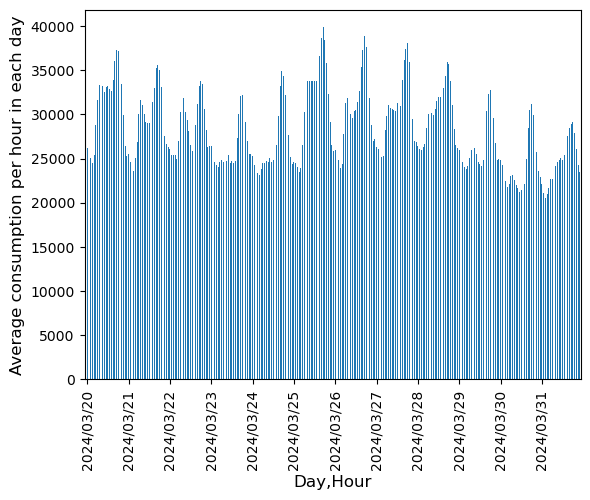

In [45]:
import matplotlib.pyplot as plt
import numpy as np
date_wise_data = df.groupby(['Date', 'Hour']).mean().reset_index()
def combine_date_hour(arg):
    return '%s (%s)'%(arg['Date'], arg['Hour'])
date_wise_data['Date + Hour'] = date_wise_data.apply(combine_date_hour, axis=1)
date_wise_data
date_wise_data["Supply"].plot.bar()
plt.ylabel('Average consumption per hour in each day',fontsize=12)
plt.xlabel('Day,Hour',fontsize=12)
#Reducing the number of bins
plt.locator_params(axis='x', nbins=30)
plt.xticks(np.arange(1,288,step=24),date_wise_data['Date'].unique())

#### Now let's plot data about hourly power supply for each day

In [13]:
fig2 = px.histogram(grouped_data, x="Date", y='Supply', color='Hour', histfunc='avg', barmode='group')
fig2.update_layout(title="Hourly average power supply for each day", height=700)
fig2.show()